In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests as r

# QUESTION 1 PART 1

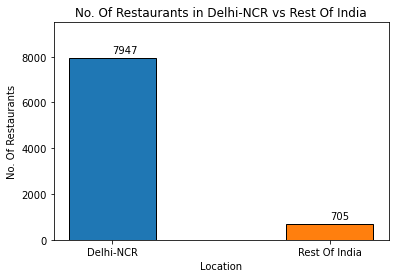

In [5]:
d= pd.read_csv('zomato.csv',encoding='latin-1')
d=d[d['Country Code']==1]
data=d.copy()
a=data.copy()
b=a[(a.City=='New Delhi')|(a.City=='Ghaziabad')|(a.City=='Noida')|(a.City=='Gurgaon')|(a.City=='Faridabad')]
m=b.City.count()
n=a.City.count()-m
plt.title('No. Of Restaurants in Delhi-NCR vs Rest Of India')
plt.xlabel('Location')
plt.ylabel('No. Of Restaurants')
plt.bar(height=m,x='Delhi-NCR',width=0.4,edgecolor='black')
plt.bar(height=n,x='Rest Of India',width=0.4,edgecolor='black')
plt.text(x='Delhi-NCR', y=m+200,s=m)
plt.text(x='Rest Of India',y=n+200,s=n)
plt.ylim(0,9500)
plt.show()

# QUESTION 1 PART 2

In [6]:
c=a[(a.City!='New Delhi')&(a.City!='Ghaziabad')&(a.City!='Noida')&(a.City!='Gurgaon')&(a.City!='Faridabad')]
cui_d=b.Cuisines
delhi_dict={}
for i in cui_d:
    array=i.strip().split(",") 
    for ele in array:
        if ele.strip() in delhi_dict:
            delhi_dict[ele.strip()]+=1
        else:
            delhi_dict[ele.strip()]=1
rest_dict={}
cui_r=c.Cuisines
for i in cui_r:
    array=i.strip().split(",") 
    for ele in array:
        if ele.strip() in rest_dict:
            rest_dict[ele.strip()]+=1
        else:
            rest_dict[ele.strip()]=1
a1=delhi_dict.keys()
a2=rest_dict.keys()
a1=set(a1)
a2=set(a2)
final=list(a2-a1)
print('Cuisines which are not present in Delhi-NCR but in Rest Of India according to the data-set:')
print(*final)
import requests
import json
r=requests.get("https://developers.zomato.com/api/v2.1/cuisines",headers={"Accept":"application/json",
                                                                        "user-key":"68a952b60155797d28def1585d888b9f"}
               ,params={'city_id':1})
data=r.json()
dict=[]
for i in data['cuisines']:
    dict.append(i['cuisine']['cuisine_name'])

dict=set(dict)
print("Below are the dishes which are not present in Delhi-NCR but in Rest of India according to Zomato-API:")
print(*(set(final)-dict.intersection(set(final))))

Cuisines which are not present in Delhi-NCR but in Rest Of India according to the data-set:
Malwani BBQ German Cajun
Below are the dishes which are not present in Delhi-NCR but in Rest of India according to Zomato-API:
Malwani German Cajun


# QUESTION 1 PART 3

In [7]:
max_delhi=sorted(delhi_dict,key=delhi_dict.get,reverse=True)
print("    Top Cuisines served in Delhi-NCR")
print()
delhi=pd.DataFrame(((max_delhi[i],delhi_dict[max_delhi[i]]) for i in range(10)),columns=['Cuisine Type','Number Of Restaurants'])
print(delhi)
max_rest=sorted(rest_dict,key=rest_dict.get,reverse=True)
print()
print("     Top Cuisines served in Rest of India")
print()
rest=pd.DataFrame(((max_rest[i],rest_dict[max_rest[i]]) for i in range(10)),columns=['Cuisine Type','Number Of Restaurants'])
print(rest)

    Top Cuisines served in Delhi-NCR

   Cuisine Type  Number Of Restaurants
0  North Indian                   3597
1       Chinese                   2448
2     Fast Food                   1866
3       Mughlai                    933
4        Bakery                    697
5  South Indian                    569
6   Continental                    547
7      Desserts                    542
8   Street Food                    538
9       Italian                    535

     Top Cuisines served in Rest of India

   Cuisine Type  Number Of Restaurants
0  North Indian                    349
1       Chinese                    242
2   Continental                    177
3       Italian                    147
4          Cafe                    136
5     Fast Food                     97
6  South Indian                     62
7       Mughlai                     59
8      Desserts                     55
9       Mexican                     50


# QUESTION 1 PART 4

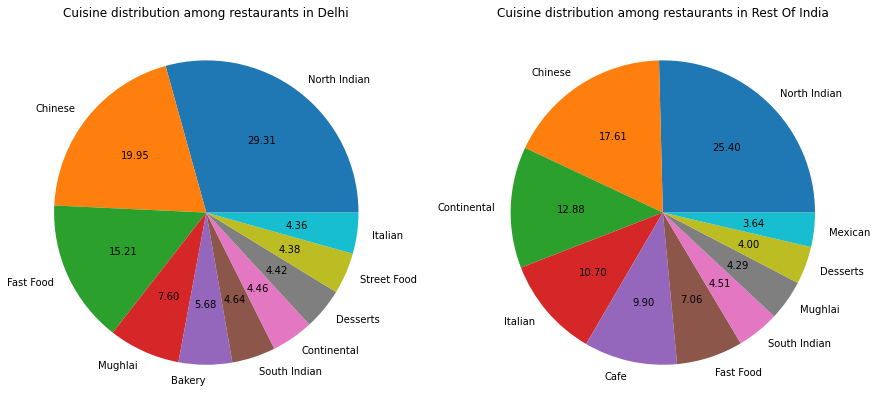

In [8]:
fig,axs=plt.subplots(nrows=1,ncols=2,figsize=(15,8))
axs[0].pie(x=delhi['Number Of Restaurants'],labels=delhi['Cuisine Type'],autopct="%.2f")
axs[1].pie(x=rest['Number Of Restaurants'],labels=rest['Cuisine Type'],autopct="%.2f")
axs[0].title.set_text('Cuisine distribution among restaurants in Delhi')
axs[1].title.set_text('Cuisine distribution among restaurants in Rest Of India')
autoAxis = axs[0].axis()
plt.show()
#Analysis of Q1 part4 done in word file

# QUESTION 2 PART 1

# PART 1:Number of Votes for a given Restaurant

Text(0, 0.5, 'VOTES')

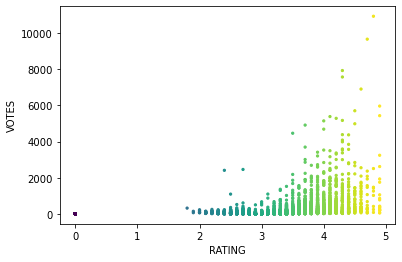

In [9]:
data=d.copy()
rating=data['Aggregate rating']
votes=data['Votes']
plt.scatter(rating,votes,c=rating,marker='.',s=20)
plt.xlabel('RATING')
plt.ylabel('VOTES')

# Part 2:Restaurant serving more number of cuisines.

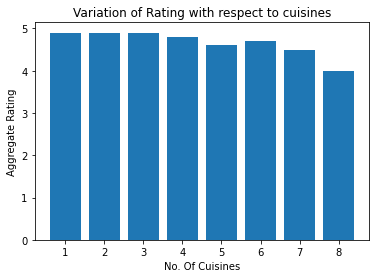

In [10]:
numcus=data['Cuisines']
def cal(s):
    n=str(s)
    n=len(s.split(','))
    return n
numcus=numcus.apply(cal)
plt.bar(height=data['Aggregate rating'],x=numcus)
plt.title('Variation of Rating with respect to cuisines')
plt.ylabel('Aggregate Rating')
plt.xlabel('No. Of Cuisines')
plt.show()

# Part 3:Average Cost of Restaurant

Text(0.5, 0, 'Average cost')

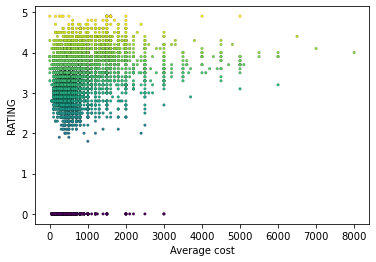

In [11]:
i=0
def g(n):
    global i
    if data['Country Code'].iloc[i]==14:
        n=n*47.08
    elif data['Country Code'].iloc[ i]==30:
        n=n*16.14
    elif data['Country Code'].iloc[ i]==37:
        n=n*53.80
    elif data['Country Code'].iloc[ i]==94:
        n=n*0.0052
    elif data['Country Code'].iloc[ i]==148:
        n=n*45.11
    elif data['Country Code'].iloc[ i]==162:
        n=n*1.42
    elif data['Country Code'].iloc[ i]==166:
        n=n*19.82
    elif data['Country Code'].iloc[ i]==184:
        n=n*51.80
    elif data['Country Code'].iloc[ i]==189:
        n=n*4.61
    elif data['Country Code'].iloc[ i]==191:
        n=n*0.40
    elif data['Country Code'].iloc[ i]==208:
        n=n*11.56
    elif data['Country Code'].iloc[ i]==214:
        n=n*19.65
    elif data['Country Code'].iloc[ i]==215:
        n=n*92.54
    elif data['Country Code'].iloc[ i]==216:
        n=n*72.17
    else:
        n=n
    i= i+1
    return n
ac=data['Average Cost for two'].apply(g)
plt.scatter(ac,rating,c=rating,marker='.',s=30,edgecolor='black',linewidth=0.1)
plt.ylabel('RATING')
plt.xlabel('Average cost')

# Part 4 : Restaurant Serving some more specefic cuisine

The restarants having specific food sell:
Kashmiri Nepalese Naga Assamese Juices Parsi Kerala Goan Bengali South Indian Thai Bihari Vietnamese Seafood Awadhi European Fast Food Finger Food Lucknowi Mexican Chinese Mithai Korean Afghani Andhra American North Eastern Bakery Sushi Rajasthani Drinks Only Hyderabadi Continental Italian Beverages Raw Meats Desserts Cafe Maharashtrian Biryani Mediterranean Cuisine Varies Turkish Tea Oriya Modern Indian Street Food Tibetan Pizza North Indian Healthy Food Lebanese Asian Japanese Gujarati Mughlai Ice Cream South American


Text(0.5, 0, 'No of cuisines')

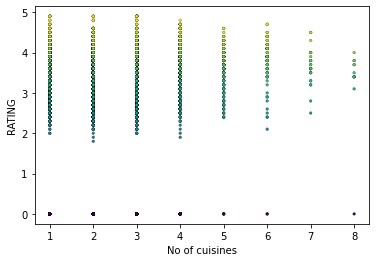

In [13]:
bool=numcus==1
sp=numcus[bool]
spr=rating[bool]
a=data['Cuisines']
a=a[bool]
plt.scatter(sp,spr,c=spr,marker='.',s=30,linewidth=0.2,edgecolor='black')
bool=numcus>1
s=numcus[bool]
sr=rating[bool]
plt.scatter(s,sr,c=sr,marker='.',s=30,linewidth=0.2,edgecolor='black')
print("The restarants having specific food sell:")
print(*set(a))
plt.ylabel('RATING')
plt.xlabel('No of cuisines')

# PART:2

In [193]:
data=d.copy()
data['WR']=data['Votes']*data['Aggregate rating']
data=data.groupby('Locality').sum()
data.WR=data.WR/data.Votes
data.dropna(subset=['WR'],inplace=True)
a=data.sort_values('WR',ascending=False).loc[:,'WR']
print(" Weighted User Rating for Localities All over the world")
print(a.iloc[0:10])

 Weighted User Rating for Localities All over the world
Locality
Hotel Clarks Amer, Malviya Nagar    4.900000
Aminabad                            4.900000
Friends Colony                      4.886916
Powai                               4.841869
Kirlampudi Layout                   4.820161
Deccan Gymkhana                     4.800000
Express Avenue Mall,  Royapettah    4.800000
Banjara Hills                       4.718762
Sector 5, Salt Lake                 4.707023
Riverside Mall, Gomti Nagar         4.700000
Name: WR, dtype: float64


# VISUALISATION

# QUESTION 3:PART 1

Text(0, 0.5, 'Number of Outlets')

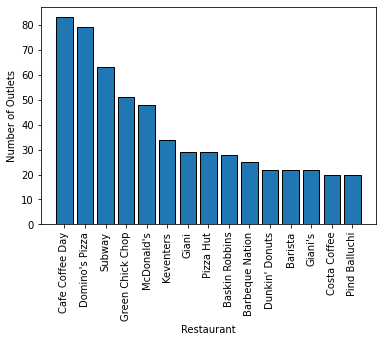

In [225]:
data=d.copy()
data['Restaurant Name'].dropna(inplace=True)
a=data['Restaurant Name'].value_counts()[:15]
plt.bar(a.index,a,edgecolor='black')
plt.xticks(rotation=90)
plt.xlabel('Restaurant')
plt.ylabel('Number of Outlets')

# Question 3 Part 2

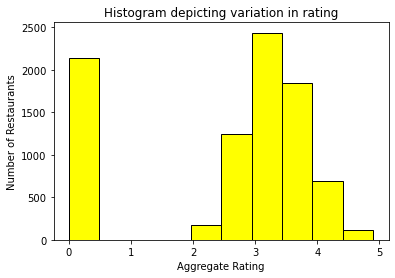

In [234]:
plt.title('Histogram depicting variation in rating')
data['Aggregate rating'].dropna(inplace=True)
plt.hist(x=d['Aggregate rating'],edgecolor='black',color='yellow')
plt.xlabel('Aggregate Rating')
plt.ylabel('Number of Restaurants')
plt.show()

# Question 3 Part 3

Text(0, 0.5, 'Votes')

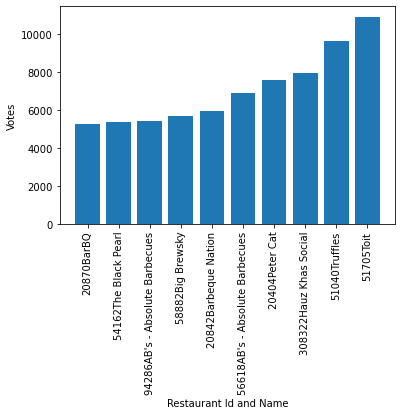

In [36]:
d= pd.read_csv('zomato.csv',encoding='latin-1')
data=d.copy()
data.sort_values('Votes',inplace=True)
a,b=data['Restaurant ID'].iloc[-10:],data.Votes.iloc[-10:]
plt.bar(np.array(a,dtype=str)+np.array(data['Restaurant Name'].iloc[-10:]),b)
plt.xticks(rotation=90)
plt.xlabel('Restaurant Id and Name')
plt.ylabel('Votes')

# Question 3 Part 4:

<ipython-input-14-c7c2461d3b5b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t.dropna(inplace=True)


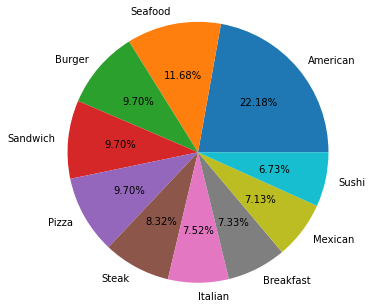

In [14]:
d= pd.read_csv('zomato.csv',encoding='latin-1')
data=d.copy()
data=data[data['Country Code']==216]
t=data[['Cuisines']]
t.dropna(inplace=True)
us_cuisines={}
for i in t['Cuisines']:
    arr=i.strip().split(',')
    for j in arr:
        if j.strip() in us_cuisines:
            us_cuisines[j.strip()]+=1
        else:
            us_cuisines[j.strip()]=1
# for i in us_cuisines:
#     print(i)
sorted_values=sorted(us_cuisines,key=us_cuisines.get,reverse=True)[0:10] 
size_array=[]
for i in sorted_values:
    size_array.append(us_cuisines[i])
print()
print()
plt.pie(size_array,labels=sorted_values,autopct="%.2f%%",radius=1.5)
plt.show()

# Question 3 Part 5:


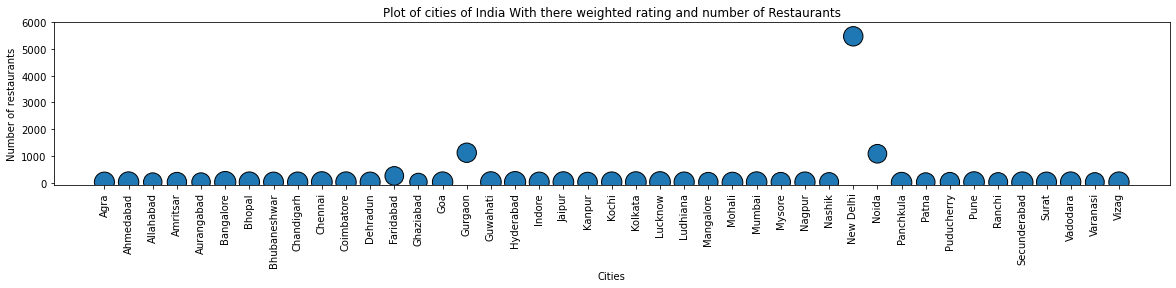

In [39]:
dataf=pd.read_csv('zomato.csv',encoding='latin-1')
city_grouped=dataf[dataf['Country Code']==1].groupby('City')
cities=[]
num_restaurants=[]
weighted_rating=[]
for key,item in city_grouped:
    total_votes=item['Votes'].sum()
    w=(item['Votes']*item['Aggregate rating']).sum()
    ans=w/total_votes
    weighted_rating.append(ans)
    num_restaurants.append(len(item))
    cities.append(key)
plt.figure(figsize=(20,3))
weighted_rating=np.array(weighted_rating)
weighted_rating*=100
plt.title("Plot of cities of India With there weighted rating and number of Restaurants")
plt.scatter(cities, num_restaurants, s=weighted_rating, edgecolor='black')
plt.xticks(rotation=90)
plt.xlabel('Cities')
plt.ylabel('Number of restaurants')
plt.ylim(-100,6000)
plt.show()